In [12]:
import pandas as pd
aviation_df = pd.read_csv("AviationData.csv", encoding="ISO-8859-1", low_memory=False)
state_df = pd.read_csv("USState_Codes.csv", encoding="ISO-8859-1")

aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
#summary of dataset structure
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
#number of missing values in each column
aviation_df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [16]:
#show column names
aviation_df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [18]:
#drop columns mostly empty or not useful
aviation_df = aviation_df.drop(columns=['Publication.Date', 'Investigation.Type', 'Airport.Code'], errors='ignore')
print(aviation_df.head())

         Event.Id Accident.Number  Event.Date         Location        Country  \
0  20001218X45444      SEA87LA080  1948-10-24  MOOSE CREEK, ID  United States   
1  20001218X45447      LAX94LA336  1962-07-19   BRIDGEPORT, CA  United States   
2  20061025X01555      NYC07LA005  1974-08-30    Saltville, VA  United States   
3  20001218X45448      LAX96LA321  1977-06-19       EUREKA, CA  United States   
4  20041105X01764      CHI79FA064  1979-08-02       Canton, OH  United States   

    Latitude   Longitude Airport.Name Injury.Severity Aircraft.damage  ...  \
0        NaN         NaN          NaN        Fatal(2)       Destroyed  ...   
1        NaN         NaN          NaN        Fatal(4)       Destroyed  ...   
2  36.922223  -81.878056          NaN        Fatal(3)       Destroyed  ...   
3        NaN         NaN          NaN        Fatal(2)       Destroyed  ...   
4        NaN         NaN          NaN        Fatal(1)       Destroyed  ...   

  Schedule Purpose.of.flight Air.carrier Tot

In [ ]:
#convert the Event.Date column to datetime
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'],errors='coerce')
aviation_df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [20]:
#drop rows where Event.Date is missing
aviation_df = aviation_df.dropna(subset=['Event.Date'])
aviation_df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [22]:
#fill other missing values
aviation_df['Weather.Condition']= aviation_df['Weather.Condition'].fillna('Unknown')
aviation_df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [24]:
aviation_df.info

<bound method DataFrame.info of              Event.Id Accident.Number  Event.Date         Location  \
0      20001218X45444      SEA87LA080  1948-10-24  MOOSE CREEK, ID   
1      20001218X45447      LAX94LA336  1962-07-19   BRIDGEPORT, CA   
2      20061025X01555      NYC07LA005  1974-08-30    Saltville, VA   
3      20001218X45448      LAX96LA321  1977-06-19       EUREKA, CA   
4      20041105X01764      CHI79FA064  1979-08-02       Canton, OH   
...               ...             ...         ...              ...   
88884  20221227106491      ERA23LA093  2022-12-26    Annapolis, MD   
88885  20221227106494      ERA23LA095  2022-12-26      Hampton, NH   
88886  20221227106497      WPR23LA075  2022-12-26       Payson, AZ   
88887  20221227106498      WPR23LA076  2022-12-26       Morgan, UT   
88888  20221230106513      ERA23LA097  2022-12-29       Athens, GA   

             Country   Latitude   Longitude Airport.Name Injury.Severity  \
0      United States        NaN         NaN        

In [32]:
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce')
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

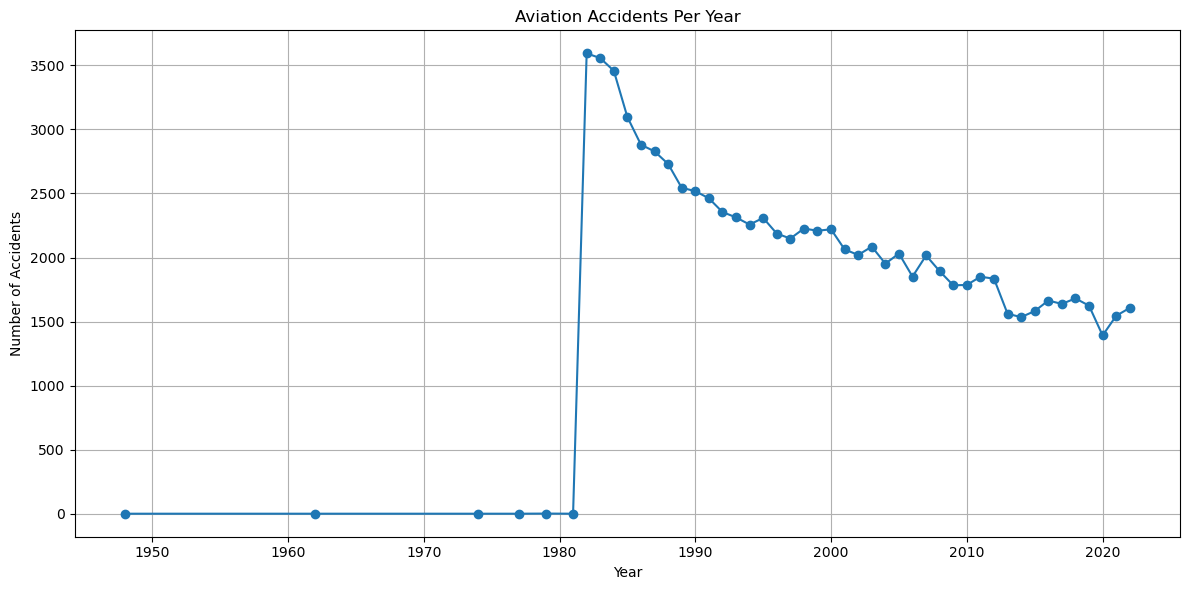

In [34]:
import matplotlib.pyplot as plt
#group by year and count accidents
yearly_counts = aviation_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


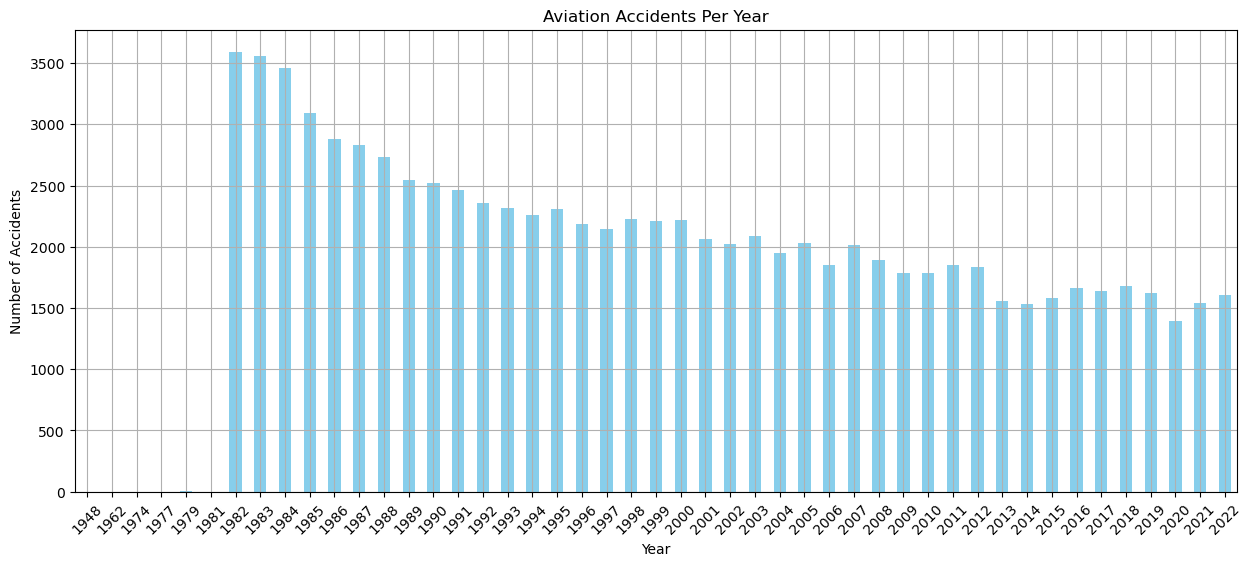

In [36]:
yearly_counts.plot(kind='bar', figsize=(15,6), color='skyblue')
plt.title("Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
#to look for extremes
aviation_df['Total.Fatal.Injuries'].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

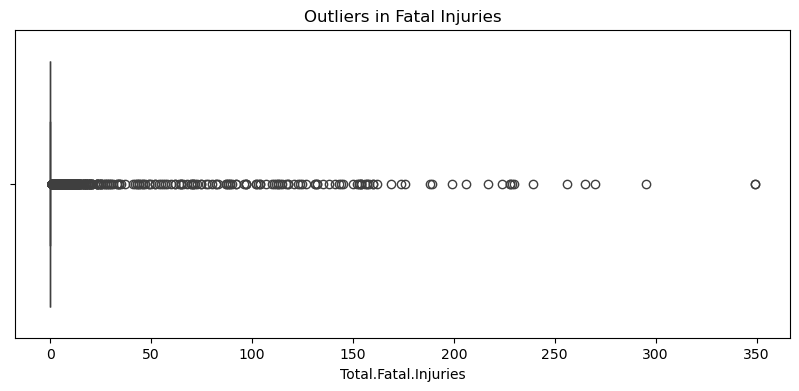

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
#visually spot outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=aviation_df['Total.Fatal.Injuries'])
plt.title("Outliers in Fatal Injuries")
plt.show()
#any dots far from the box are outliers

In [42]:
#actual outlier rows
aviation_df.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

,Event.Id,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year
40881,20020124X00116,DCA97WA007B,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,Fatal(349),NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,Unknown,NaN,Foreign,1996
40882,20020124X00116,DCA97WA007A,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,Fatal(349),NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,Unknown,NaN,Foreign,1996
75437,20140718X92314,DCA14RA127,2014-07-17,"Hrabove, Ukraine",Ukraine,NaN,NaN,NaN,Fatal,Destroyed,...,NaN,MALAYSIAN AIRLINES SYSTEM BERHAD,295.0,0.0,0.0,0.0,Unknown,NaN,NaN,2014
22082,20001213X27403,DCA89RA014,1988-12-21,"LOCKERBIE, United Kingdom",United Kingdom,NaN,NaN,NaN,Fatal(270),Destroyed,...,Unknown,NaN,270.0,2.0,3.0,0.0,UNK,NaN,Foreign,1988
51769,20011130X02321,DCA02MA001,2001-11-12,"Belle Harbor, NY",United States,NaN,NaN,John F. Kennedy International,Fatal(265),Destroyed,...,NaN,NaN,265.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,2001
13597,20001214X38384,DCA86RA010,1985-12-12,"GANDER, Canada",Canada,NaN,NaN,GANDER INTERNATIONAL,Fatal(256),Destroyed,...,Unknown,NaN,256.0,0.0,0.0,0.0,IMC,NaN,Foreign,1985
74808,20140308X91420,DCA14RA076,2014-03-08,"Kuala Lampur, Malaysia",Malaysia,NaN,NaN,Kuala Lumper International,Fatal,Destroyed,...,NaN,Malaysian Airlines,239.0,0.0,0.0,0.0,Unknown,NaN,NaN,2014
40104,20001208X06204,DCA96MA070,1996-07-17,"EAST MORICHES, NY",United States,NaN,NaN,NaN,Fatal(230),Destroyed,...,Unknown,NaN,230.0,0.0,0.0,0.0,VMC,Climb,Probable Cause,1996
44807,20001211X11037,DCA98RA085,1998-09-02,"NOVA SCOTIA, Canada",Canada,NaN,NaN,NaN,Fatal(229),Destroyed,...,Unknown,NaN,229.0,0.0,0.0,NaN,UNK,NaN,Foreign,1998
42415,20001208X08606,DCA97MA058,1997-08-06,"NIMITZ HILL, GU",United States,NaN,NaN,AGANA INTERNATIONAL AIRPO,Fatal(228),Destroyed,...,Unknown,NaN,228.0,26.0,NaN,NaN,IMC,Approach,Probable Cause,1997


In [44]:
# Summary and Recommendations

from IPython.display import Markdown

Markdown("""
#Summary of Findings

- Most aviation accidents occurred between the 1970s–1990s.
- Weather condition is often unknown or VFR (visual flight rules).
- Some accidents had extremely high fatalities (likely commercial airliners).

#Business Recommendations

1. *Focus Safety Checks on Older Aircraft Models*  
   Older aircraft are more likely to be involved in incidents.

2. *Improve Data Collection for Weather Conditions*  
   Many records have missing or unknown weather — more detail can help prevent accidents.

3. *Target Training in High-Incident Regions*  
   Use location data to identify hotspots and prioritize safety education.
""")


#Summary of Findings

- Most aviation accidents occurred between the 1970s–1990s.
- Weather condition is often unknown or VFR (visual flight rules).
- Some accidents had extremely high fatalities (likely commercial airliners).

#Business Recommendations

1. *Focus Safety Checks on Older Aircraft Models*  
   Older aircraft are more likely to be involved in incidents.

2. *Improve Data Collection for Weather Conditions*  
   Many records have missing or unknown weather — more detail can help prevent accidents.

3. *Target Training in High-Incident Regions*  
   Use location data to identify hotspots and prioritize safety education.


In [48]:
aviation_df.to_csv("cleaned_aviation_data.csv", index=False)